In [1]:
!pip install pandas

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [4]:
# Η εξόρυξη των δεδομένων έγινε με τη βοήθεια του Chrome Web Scraper. Συγκεκριμένα, στην εφημερίδα Newsbeast έκανα αναζήτηση της λέξης "ανεργία" και στη συνέχεια έκανα scraping όλα τα άρθρα που εμφανίστηκαν (title, body, date)

df = pd.read_csv("/gdrive/My Drive/newsbeastanergia.csv")

In [5]:
df.head()

web-scraper-order  ...        date
0   1593269385-1721  ...         NaN
1   1593268906-1498  ...  02/12/2018
2    1593266429-335  ...         NaN
3    1593266567-399  ...         NaN
4    1593267680-921  ...         NaN

[5 rows x 8 columns]

In [6]:
# Σβήνω κάποιες στήλες διότι δεν μου προσδίδουν καμία χρήσιμη πληροφορία 

df = df.drop('web-scraper-order', axis = 1)
df = df.drop('web-scraper-start-url', axis = 1)
df = df.drop('articlelink-href', axis = 1)
df = df.drop('pagination', axis = 1)
df = df.drop('pagination-href', axis = 1)

In [7]:
df.shape

(2000, 3)

In [8]:
# Δεν θέλω να έχει ... στη μέση

pd.set_option("display.max_rows",2000)

In [9]:
df

articlelink  ...        date
0                    Κάτω από το 40% η ανεργία των νέων  ...         NaN
1     Ο παπάς στη Ζάκυνθο και η καταγγελία που ξετύλ...  ...  02/12/2018
2     Κορονοϊός: Μαύρη μέρα στην Ισπανία – 950 νεκρο...  ...         NaN
3     Μπρούνο Λεμέρ: Ο κορονοϊός απειλεί την ευρωζών...  ...         NaN
4     Γερμανικός Τύπος: Μετά τα χρόνια της κρίσης οι...  ...         NaN
5     Τζανακόπουλος: Έρχεται λίστα με 300 αυθαίρετα ...  ...  08/08/2018
6     Εικόνες από τη διαμαρτυρία γιατρών και νοσηλευ...  ...         NaN
7     Λαφαζάνης: Ενδεικτικό της εθεδουλίας της κυβέρ...  ...  26/08/2018
8     Βαλκάνια και χώρες της βόρειας Αφρικής δεν θέλ...  ...  28/06/2018
9     Bloomberg: Η Ευρώπη μπορεί να παραδειγματιστεί...  ...  02/04/2020
10    Αχτσιόγλου: Τεράστιος μύθος το ότι ο ΣΥΡΙΖΑ συ...  ...  20/12/2018
11    Η Ελλάδα και πάλι ενδιαφέρουσα αγορά για τις γ...  ...         NaN
12    Μεγάλη έρευνα: Τι συμβαίνει στα σπίτια των Ελλ...  ...         NaN
13    Πέντε πράγματα που πρέπει να γνωρίζουμε τις εκ...  ...         NaN
14    Πιτσιόρλας: Οι ρυθμοί ανάπτυξης είναι υπαρκτοί...  ...  01/11/2018
15    Πέτσας: Επιλέξαμε την εργασία από την ανεργία....  ...  26/03/2020
16    Ζαχαριάδης: Στρουθοκαμηλισμός από τη ΝΔ στη Συ...  ...  02/07/2019
17    Παππάς: Η Ν.Δ φουσκώνει μπαλόνια και τα σκάει ...  ...  09/12/2018
18    Bloomberg: Γιατί οι Έλληνες στράφηκαν εναντίον...  ...         NaN
19    Βουλή: Τι περιλαμβάνει το νομοσχέδιο με τις επ...  ...         NaN
20    Βρούτσης για εκ περιτροπής εργασία: Έκτακτα, π...  ...  26/03/2020
21    Γάλλος ΥΠΟΙΚ: Πρέπει να επιταχυνθεί η σταδιακή...  ...         NaN
22    Το Streetwork και οι άστεγοι στους δρόμους της...  ...  24/12/2018
23    «Αλουμινάδες, σοβατζίδες, γυψαδόροι κάνουν ευχ...  ...  06/09/2018
24    Φωτίου: Όταν αναλάβαμε, η χώρα είχε χάσει ήδη ...  ...         NaN
25    Οι 11 κλάδοι με τους 240.000 εργαζομένους πλήρ...  ...         NaN
26    Μητσοτάκης: Άκρατη παροχολογία από τον κ. Τσίπ...  ...         NaN
27    Κατηγορείται για τη δολοφονία της συζύγου του ...  ...         NaN
28    Πόσες ώρες πρέπει να δουλεύουμε για να είμαστε...  ...  19/06/2019
29    «Μαύρη» Δευτέρα στην Αργεντινή στον απόηχο της...  ...         NaN
30               «Τέλος με τους χρεωκοπημένους Έλληνες»  ...         NaN
31    Ισπανικές εκλογές: Τα τέσσερα χρόνια πολιτικής...  ...  07/11/2019
32    Χαρίτσης για Κουκάκι: Δεν αποσαφήνισε ο κ. Μητ...  ...  18/12/2019
33    Τον Νοέμβριο το νομοσχέδιο για τη μείωση των α...  ...         NaN
34    Γεννηματά: Δεν θα κάνουμε αντιπολίτευση για τη...  ...         NaN
35    Πτώση σημειώνουν οι Διεθνείς αγορές εν μέσω φό...  ...         NaN
36    Παππάς: Το πρόγραμμα Μητσοτάκη περιλαμβάνει ασ...  ...         NaN
37    O άνθρωπος που έσωσε τους φτωχούς από τους τοκ...  ...         NaN
38    Νετανιάχου: Το Ισραήλ δεν θα χάσει μια «ιστορι...  ...  26/05/2020
39    Μειώθηκε η ανεργία τον Δεκέμβριο του 2019 – Στ...  ...         NaN
40    Τσίπρας: Στην οικονομία τα πράγματα θα γίνοντα...  ...         NaN
41    Στους 875.000 οι άνεργοι στην Ελλάδα το Νοέμβρ...  ...         NaN
42    Τσίπρας: Η πατρίδα μας έκανε το αποφασιστικό β...  ...         NaN
43    Ο νέος αντίπαλος του Ερντογάν και του κόμματός...  ...  10/09/2019
44    «Έχω καταλήξει ότι έγινε συμπλοκή και πήγε ο Ρ...  ...  28/06/2019
45    Γιακουμάτος: «Φούμαρα» η τροπολογία για την αύ...  ...         NaN
46    Γεροβασίλη: Η ουσία είναι ότι η κυβέρνηση διασ...  ...         NaN
47    Κουμουτσάκος: Μονοπώλιο κοινωνικής ευαισθησίας...  ...         NaN
48    ΓΣΕΕ: Φαινομενική και ουδόλως ουσιαστική η έξο...  ...  22/08/2018
49    Μίχαλος: Πρέπει να συνειδητοποιήσουμε ότι η λο...  ...         NaN
50    «Ο Τσίπρας υπόσχεται αύξηση του κατώτατου μισθ...  ...         NaN
51    Αυστραλία: Πάνω από 150 οικονομολόγοι ζητούν ν...  ...         NaN
52    «Πράσινο φως» Μητσοτάκη σε Γιαννακόπουλο για τ...  ...         NaN
53    Σημίτης: Οι Ευρωπαίοι θεωρούν βέβαιο ότι η Ελλ...  ...  30/12/2018
54    ΓΣΕΕ: Την περίοδο 2007-

In [10]:
df.dtypes

articlelink    object
body           object
date           object
dtype: object

In [11]:
df['date'].astype(str)

0              nan
1       02/12/2018
2              nan
3              nan
4              nan
5       08/08/2018
6              nan
7       26/08/2018
8       28/06/2018
9       02/04/2020
10      20/12/2018
11             nan
12             nan
13             nan
14      01/11/2018
15      26/03/2020
16      02/07/2019
17      09/12/2018
18             nan
19             nan
20      26/03/2020
21             nan
22      24/12/2018
23      06/09/2018
24             nan
25             nan
26             nan
27             nan
28      19/06/2019
29             nan
30             nan
31      07/11/2019
32      18/12/2019
33             nan
34             nan
35             nan
36             nan
37             nan
38      26/05/2020
39             nan
40             nan
41             nan
42             nan
43      10/09/2019
44      28/06/2019
45             nan
46             nan
47             nan
48      22/08/2018
49             nan
50             nan
51             nan
52          

In [12]:
# Μετατρέπω το string της ημερομηνίας σε datetime

df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y')

In [13]:
# Προσθέτω νέες στήλες στο dataframe και συγκεκριμένα το χρόνο, το μήνα και την ημέρα

df['year'] = pd.DatetimeIndex(df['date']).year
df['month'] = pd.DatetimeIndex(df['date']).month
df['day'] = pd.DatetimeIndex(df['date']).day

In [14]:
df.dtypes

articlelink            object
body                   object
date           datetime64[ns]
year                  float64
month                 float64
day                   float64
dtype: object

In [15]:
df['year'] = df['year'].fillna(0).astype(int)
df['month'] = df['month'].fillna(0).astype(int)
df['day'] = df['day'].fillna(0).astype(int)

In [16]:
df.head()

articlelink  ... day
0                 Κάτω από το 40% η ανεργία των νέων  ...   0
1  Ο παπάς στη Ζάκυνθο και η καταγγελία που ξετύλ...  ...   2
2  Κορονοϊός: Μαύρη μέρα στην Ισπανία – 950 νεκρο...  ...   0
3  Μπρούνο Λεμέρ: Ο κορονοϊός απειλεί την ευρωζών...  ...   0
4  Γερμανικός Τύπος: Μετά τα χρόνια της κρίσης οι...  ...   0

[5 rows x 6 columns]

In [17]:
# Βρίσκω πόσα άρθρα εντοπίζονται ανά χρονιά

df['year'].value_counts()

0       1000
2019     430
2020     298
2018     272
Name: year, dtype: int64

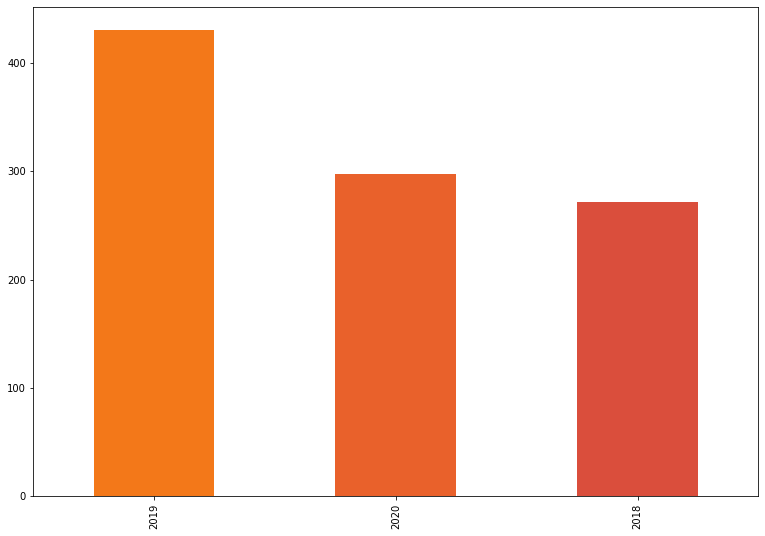

In [18]:
from matplotlib import cm
color = cm.inferno_r(np.linspace(.3, 4, 70))
color

df['year'].value_counts(sort=True).drop([0]).plot(kind='bar', color=color, legend=False, figsize=(13, 9))

In [19]:
from google.colab import files
# Save Figure
plt.savefig("year.png")

# Save Transparent Figure
plt.savefig("year.png", transparent=True)

<Figure size 432x288 with 0 Axes>

In [20]:
df.dtypes

articlelink            object
body                   object
date           datetime64[ns]
year                    int64
month                   int64
day                     int64
dtype: object

In [21]:
# Χρησιμοποιώ το πεδίο της ημερομηνίας ως index

df = df.set_index(pd.DatetimeIndex(df['date']))

In [22]:
df.head()

articlelink  ... day
date                                                           ...    
NaT                        Κάτω από το 40% η ανεργία των νέων  ...   0
2018-12-02  Ο παπάς στη Ζάκυνθο και η καταγγελία που ξετύλ...  ...   2
NaT         Κορονοϊός: Μαύρη μέρα στην Ισπανία – 950 νεκρο...  ...   0
NaT         Μπρούνο Λεμέρ: Ο κορονοϊός απειλεί την ευρωζών...  ...   0
NaT         Γερμανικός Τύπος: Μετά τα χρόνια της κρίσης οι...  ...   0

[5 rows x 6 columns]

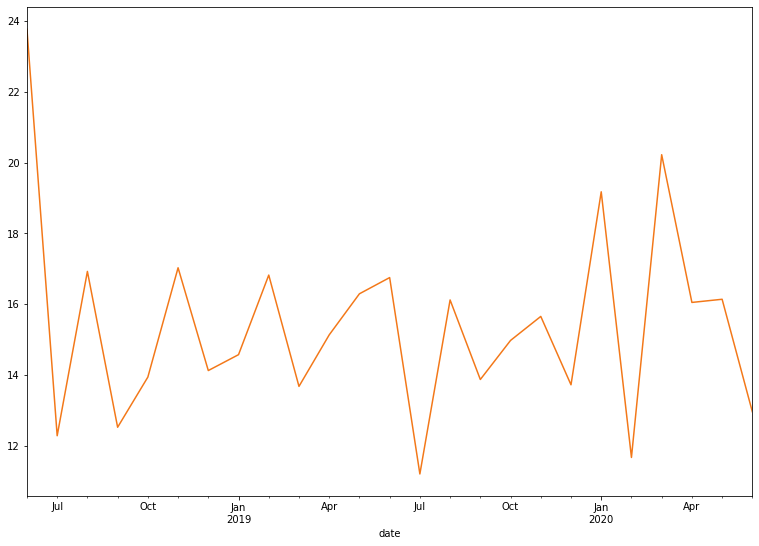

In [23]:
# Για να ομοαδοποιήσουμε με βάση τον χρόνο θέλουμε ένα special κώδικα. Εγώ τον πήρα από εδώ http://stackoverflow.com/a/17001474
# Επιλέγω να κάνω την ομαδοποίηση με βάση τη συχνότητα του μήνα 'M' = month end frequency

df.resample('M').mean().plot(y='day', color=color, legend=False, figsize=(13, 9))

In [24]:
# Καθαρίζω το dataframe από URLs - regular expressions

df['articlelink'] = df['articlelink'].str.replace(r'https?:\/\/.*[\r\n]*'," ")

In [25]:
df[df['year']==2018]['articlelink']

date
2018-12-02    Ο παπάς στη Ζάκυνθο και η καταγγελία που ξετύλ...
2018-08-08    Τζανακόπουλος: Έρχεται λίστα με 300 αυθαίρετα ...
2018-08-26    Λαφαζάνης: Ενδεικτικό της εθεδουλίας της κυβέρ...
2018-06-28    Βαλκάνια και χώρες της βόρειας Αφρικής δεν θέλ...
2018-12-20    Αχτσιόγλου: Τεράστιος μύθος το ότι ο ΣΥΡΙΖΑ συ...
2018-11-01    Πιτσιόρλας: Οι ρυθμοί ανάπτυξης είναι υπαρκτοί...
2018-12-09    Παππάς: Η Ν.Δ φουσκώνει μπαλόνια και τα σκάει ...
2018-12-24    Το Streetwork και οι άστεγοι στους δρόμους της...
2018-09-06    «Αλουμινάδες, σοβατζίδες, γυψαδόροι κάνουν ευχ...
2018-08-22    ΓΣΕΕ: Φαινομενική και ουδόλως ουσιαστική η έξο...
2018-12-30    Σημίτης: Οι Ευρωπαίοι θεωρούν βέβαιο ότι η Ελλ...
2018-08-10    Τσίπρας: Η μείωση της ανεργίας αποτυπώνει την ...
2018-09-03    Άρωμα νεοναζιστικής ακροδεξιάς ενόψει των σουη...
2018-09-20    Γιακουμάτος: «Φούμαρα» η τροπολογία για την αύ...
2018-10-09    Το δεξί χέρι της Λαγκάρντ παίρνει θέση για τις...
2018-09-05    Μαύρες λίστες εργαζομ

In [26]:
articlelink = df[df['year']==2018]['articlelink'].str.cat(sep = ' ').replace("amp", ' ')

In [27]:
articlelink

'Ο παπάς στη Ζάκυνθο και η καταγγελία που ξετύλιξε το κουβάρι για τη «μαφία του χρυσού» Τζανακόπουλος: Έρχεται λίστα με 300 αυθαίρετα που θα κατεδαφιστούν στην Αττική Λαφαζάνης: Ενδεικτικό της εθεδουλίας της κυβέρνησης η μη αντίδραση στους δασμούς των ΗΠΑ Βαλκάνια και χώρες της βόρειας Αφρικής δεν θέλουν κέντρα υποδοχής προσφύγων Αχτσιόγλου: Τεράστιος μύθος το ότι ο ΣΥΡΙΖΑ συρρίκνωσε τη μεσαία τάξη Πιτσιόρλας: Οι ρυθμοί ανάπτυξης είναι υπαρκτοί και σημαντικοί Παππάς: Η Ν.Δ φουσκώνει μπαλόνια και τα σκάει μόνη της μετά από δύο 24ωρα Το Streetwork και οι άστεγοι στους δρόμους της Θεσσαλονίκης «Αλουμινάδες, σοβατζίδες, γυψαδόροι κάνουν ευχέλαιο στον Άγιο Airbnb» ΓΣΕΕ: Φαινομενική και ουδόλως ουσιαστική η έξοδος από τα μνημόνια Σημίτης: Οι Ευρωπαίοι θεωρούν βέβαιο ότι η Ελλάδα θα ζητήσει ξανά δάνεια από τον ESM Τσίπρας: Η μείωση της ανεργίας αποτυπώνει την αλλαγή σελίδας Άρωμα νεοναζιστικής ακροδεξιάς ενόψει των σουηδικών εκλογών Γιακουμάτος: «Φούμαρα» η τροπολογία για την αύξηση του κατώτ

In [28]:
# Αφαιρώ τα STOPWORDS 

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [29]:
# Ψάχνω τα Ελληνικά stopwords.....

import spacy

In [30]:
!python -m spacy download el_core_news_sm

# Κάνω Runtime ->  Restart Runtime, για να δει τις αλλαγές από το download...

✔ Download and installation successful
You can now load the model via spacy.load('el_core_news_sm')


In [31]:
nlp = spacy.load('el_core_news_sm')

In [32]:
list(nlp.Defaults.stop_words)[0:20]

['αλλοιώτικα',
 'πόσους',
 'όλου',
 'μην',
 'ολωσδιόλου',
 'πάρα',
 'τις',
 'εαυτούς',
 'μεν',
 'κανένας',
 'οπουδήποτε',
 'πριν',
 'αναμεταξύ',
 'ουδέ',
 'μάλιστα',
 'έτεροι',
 'άλλην',
 'τόση',
 'ολόγυρα',
 'όλους']

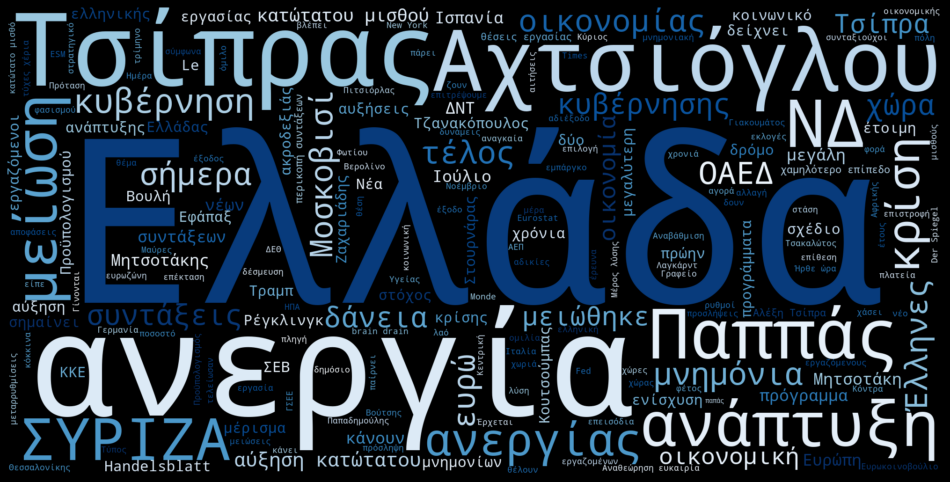

In [33]:
wordcloud = WordCloud(
    stopwords = nlp.Defaults.stop_words,
    width = 2000,
    height = 1000,
    background_color = 'black',
    colormap = "Blues"
 ).generate(articlelink)
fig = plt.figure(
    figsize = (13, 13),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [34]:
# Κάνω την ίδια διαδικασία για τα έτη 2019, 2020

df[df['year']==2019]['articlelink']

date
2019-07-02    Ζαχαριάδης: Στρουθοκαμηλισμός από τη ΝΔ στη Συ...
2019-06-19    Πόσες ώρες πρέπει να δουλεύουμε για να είμαστε...
2019-11-07    Ισπανικές εκλογές: Τα τέσσερα χρόνια πολιτικής...
2019-12-18    Χαρίτσης για Κουκάκι: Δεν αποσαφήνισε ο κ. Μητ...
2019-09-10    Ο νέος αντίπαλος του Ερντογάν και του κόμματός...
2019-06-28    «Έχω καταλήξει ότι έγινε συμπλοκή και πήγε ο Ρ...
2019-06-06           Στο 18,1% η ανεργία στην Ελλάδα τον Μάρτιο
2019-12-11    ΗΠΑ: Ο Τραμπ παραπέμπεται από τη Βουλή, η οικο...
2019-06-10    Τζανακόπουλος: Εμείς κρατήσαμε όρθια την κοινω...
2019-09-18    Μηταράκης: Δεν θα μειωθούν οι μισθοί με τις δι...
2019-10-11         Βρούτσης: Φέρνουμε διαφάνεια και νοικοκύρεμα
2019-07-15    TIME: Οι ελληνικές εκλογές φέρνουν ελπίδα σε μ...
2019-06-03    IOBE: Μικρή ενίσχυση του δείκτη οικονομικού κλ...
2019-01-16    Μοσκοβισί: Έγινε η προετοιμασία για την επόμεν...
2019-04-30    Σε άνοδο το ευρώ μετά τα στοιχεία για την ανάπ...
2019-07-02    Το τελευταίο αντίο στ

In [35]:
articlelink = df[df['year']==2019]['articlelink'].str.cat(sep = ' ').replace("amp", ' ')

In [36]:
articlelink

'Ζαχαριάδης: Στρουθοκαμηλισμός από τη ΝΔ στη Συμφωνία των Πρεσπών Πόσες ώρες πρέπει να δουλεύουμε για να είμαστε καλά ψυχολογικά Ισπανικές εκλογές: Τα τέσσερα χρόνια πολιτικής αστάθειας Χαρίτσης για Κουκάκι: Δεν αποσαφήνισε ο κ. Μητσοτάκης ότι εννοούσε κατάργηση και του οικογενειακού ασύλου Ο νέος αντίπαλος του Ερντογάν και του κόμματός του «Έχω καταλήξει ότι έγινε συμπλοκή και πήγε ο Ρουπακιάς και καθάρισε το παλικάρι» Στο 18,1% η ανεργία στην Ελλάδα τον Μάρτιο ΗΠΑ: Ο Τραμπ παραπέμπεται από τη Βουλή, η οικονομία πάει καλά Τζανακόπουλος: Εμείς κρατήσαμε όρθια την κοινωνία με πολιτικές στήριξης της πλειοψηφίας Μηταράκης: Δεν θα μειωθούν οι μισθοί με τις διατάξεις για τα εργασιακά Βρούτσης: Φέρνουμε διαφάνεια και νοικοκύρεμα TIME: Οι ελληνικές εκλογές φέρνουν ελπίδα σε μία χώρα που τη χρειάζεται IOBE: Μικρή ενίσχυση του δείκτη οικονομικού κλίματος τον Μάιο Μοσκοβισί: Έγινε η προετοιμασία για την επόμενη μεταμνημονιακή αξιολόγηση Σε άνοδο το ευρώ μετά τα στοιχεία για την ανάπτυξη Το τελευ

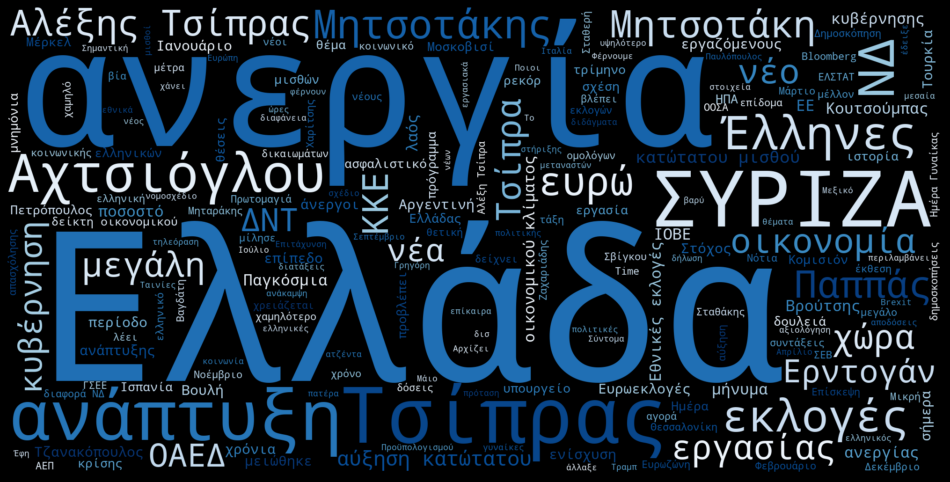

In [37]:
wordcloud = WordCloud(
    stopwords = nlp.Defaults.stop_words,
    width = 2000,
    height = 1000,
    background_color = 'black',
    colormap = "Blues"
 ).generate(articlelink)
fig = plt.figure(
    figsize = (13, 13),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [38]:
df[df['year']==2020]['articlelink']

date
2020-04-02    Bloomberg: Η Ευρώπη μπορεί να παραδειγματιστεί...
2020-03-26    Πέτσας: Επιλέξαμε την εργασία από την ανεργία....
2020-03-26    Βρούτσης για εκ περιτροπής εργασία: Έκτακτα, π...
2020-05-26    Νετανιάχου: Το Ισραήλ δεν θα χάσει μια «ιστορι...
2020-04-09    Κορονοϊός: Χαλαρώνουν μετά το Πάσχα οι περιορι...
2020-04-24    Προβλέψεις για τους ανέργους στη Γερμανία: Θα ...
2020-04-27    Κορονοϊός Γαλλία: Αυξήθηκαν οι νεκροί το τελευ...
2020-04-28    Γεννηματά: Η κυβέρνηση να υιοθετήσει την πρότα...
2020-04-15    «Ανεργία από 26 έως 31,6% λόγω κορονοϊού και α...
2020-04-09    Οι 100 ημέρες του κορονοϊού: Ο πλανήτης πρωταγ...
2020-04-02    Κορονοϊός ΗΠΑ: Ζοφερή εικόνα στην αγορά εργασί...
2020-04-27    Σοκ στην οικονομία των ΗΠΑ: 26 εκατ. Αμερικανο...
2020-05-07    Στους δρόμους όλης της χώρας βγήκαν οι καλλιτέ...
2020-02-06    Βέβαιη η Κριστίν Λαγκάρντ ότι η ΕΚΤ θα αγοράσε...
2020-03-09    Σωματείο Ελλήνων Ηθοποιών για κορονοϊό: Να δοθ...
2020-03-30    Το Twitter διέγραψε α

In [39]:
articlelink = df[df['year']==2020]['articlelink'].str.cat(sep = ' ').replace("amp", ' ')

In [40]:
articlelink

'Bloomberg: Η Ευρώπη μπορεί να παραδειγματιστεί από τα βάσανα της Ελλάδας για να αντιμετωπίσει την πανδημία Πέτσας: Επιλέξαμε την εργασία από την ανεργία. Θα αναλάβουμε όλοι μαζί το κόστος Βρούτσης για εκ περιτροπής εργασία: Έκτακτα, προσωρινά, αλλά αναγκαία τα μέτρα – Προτιμούμε την εργασία από την ανεργία Νετανιάχου: Το Ισραήλ δεν θα χάσει μια «ιστορική ευκαιρία» να επεκτείνει την κυριαρχία του σε τμήματα της Δυτικής Όχθης Κορονοϊός: Χαλαρώνουν μετά το Πάσχα οι περιορισμοί στην Πολωνία Προβλέψεις για τους ανέργους στη Γερμανία: Θα ξεπεράσουν τα 3 εκατ. το 2020 Κορονοϊός Γαλλία: Αυξήθηκαν οι νεκροί το τελευταίο 24ωρο – 437 σε μία μέρα, πάνω από 23.000 συνολικά Γεννηματά: Η κυβέρνηση να υιοθετήσει την πρόταση για τη στήριξη της εργασίας που καταθέσαμε «Ανεργία από 26 έως 31,6% λόγω κορονοϊού και ανάκαμψη από το 2021» Οι 100 ημέρες του κορονοϊού: Ο πλανήτης πρωταγωνιστεί σε σενάριο ταινίας καταστροφής Κορονοϊός ΗΠΑ: Ζοφερή εικόνα στην αγορά εργασίας με εκατομμύρια νέους ανέργους, σήμερα

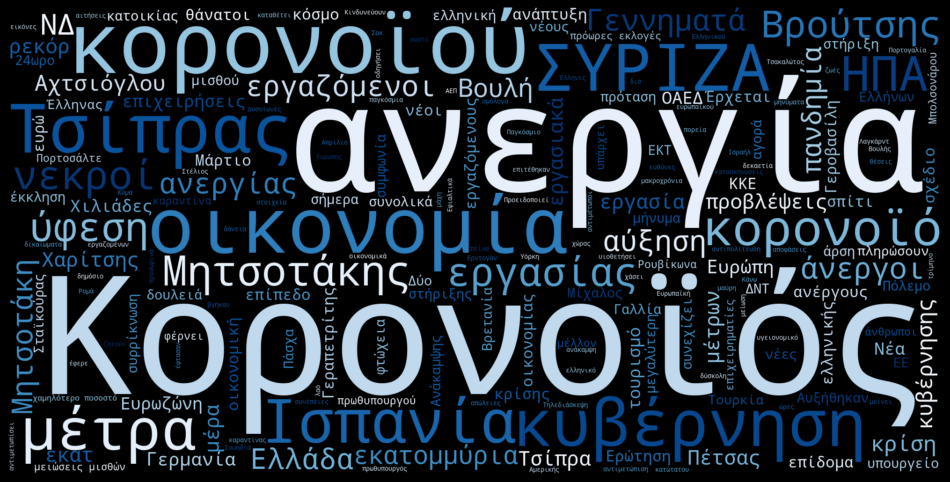

In [41]:
# Φτιάχνω ένα σύννεφο λέξεων

wordcloud = WordCloud(
    stopwords = nlp.Defaults.stop_words,
    width = 2000,
    height = 1000,
    background_color = 'black',
    colormap = "Blues"
 ).generate(articlelink)
fig = plt.figure(
    figsize = (13, 13),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [42]:
# Ξεκινώ τη διανυσματοποίηση των τίτλων

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [43]:
count_vector = cv.fit_transform(df['articlelink'])

In [44]:
count_vector.shape

(2000, 3376)

In [45]:
# Ο αριθμός "3376" αναφέρεται στο σύνολο των λέξεων που περιέχονται στους τίτλους

In [46]:
# cv.get_feature_names()

results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 

results.head()

000  003  10  100  101  106  ...  ύφεση  ύφεσης  ύψος  ώρα  ώρες  ώστε
0    0    0   0    0    0    0  ...      0       0     0    0     0     0
1    0    0   0    0    0    0  ...      0       0     0    0     0     0
2    0    1   1    0    0    0  ...      0       0     0    0     0     0
3    0    0   0    0    0    0  ...      0       0     0    0     0     0
4    0    0   0    0    0    0  ...      0       0     0    0     0     0

[5 rows x 3376 columns]

In [47]:
# cv.vocabulary_

In [48]:
# Θέτω κάποιες παραμέτρους, έτσι ώστε να μην εμφανίζονται λέξεις που είναι αρκετά συχνές αλλά ούτε και αρκετά σπάνιες

cv = CountVectorizer(stop_words= nlp.Defaults.stop_words, min_df=0.01, max_df=0.95)

In [49]:
count_vector = cv.fit_transform(df['articlelink'])

In [50]:
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 

results.head()

000  10  16  18  2019  ...  τσίπρα  τσίπρας  χαμηλότερο  χώρα  ύφεση
0    0   0   0   0     0  ...       0        0           0     0      0
1    0   0   0   0     0  ...       0        0           0     0      0
2    0   1   0   0     0  ...       0        0           0     0      0
3    0   0   0   0     0  ...       0        0           0     0      0
4    0   0   0   0     0  ...       0        0           0     0      0

[5 rows x 68 columns]

In [51]:
# Φτιάχνω τον δικό μου tokenizer, έτσι ώστε για κάθε "token" να βρίσκει το "token.lemma", δηλαδή να εμφανίζει τη βάση της λέξης, το λήμμα της

from html import unescape
def my_tokenizer(doc):
            
    # apply the preprocessing and tokenzation steps
    doc_clean = unescape(doc).lower()
    tokens = nlp(doc_clean)
    lemmatized_tokens = [token.lemma_ for token in tokens if (len(str(token.lemma_))>2)]
            
    # use CountVectorizer's _word_ngrams built in method
    # to remove stop words and extract n-grams
    return(lemmatized_tokens)

In [52]:
 cv = CountVectorizer(stop_words= nlp.Defaults.stop_words, min_df=0.01, max_df=0.95, tokenizer=my_tokenizer)
 count_vector = cv.fit_transform(df['articlelink'])
 results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
 results.head()

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['έγκαιρος', 'έκασα', 'έκαστε', 'έξαφνος', 'έτερου', 'ίσιος', 'αδιάκοπας', 'αλλιώτικας', 'αλλοιώτικο', 'αφότο', 'βεβαιότατο', 'γρήγορας', 'δίχω', 'εαυτής', 'εκάστα', 'εκάστο', 'ετού', 'ετούτε', 'ευθύ', 'εχτής', 'ιδίο', 'κάμποσε', 'κάνω', 'καθενό', 'κανενό', 'μέλλομαι', 'μεμιά', 'μερικού', 'μερικός', 'μπορώ', 'μόνα', 'μόνε', 'ολωσδιόλο', 'ολόγυρο', 'ορισμένο', 'ορισμένος', 'ορισμένω', 'ποία', 'ποιώ', 'πολλός', 'προχθά', 'προχτέ', 'πόσα', 'πόσο', 'σει', 'στος', 'συχνά', 'συχνέ', 'ταύτο', 'τούτε', 'τόσε'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


2019  2020  άνεργοι  έλληνες  ...  τσίπρας  χαμηλότερος  χώρα  ύφεση
0     0     0        0        0  ...        0            0     0      0
1     0     0        0        0  ...        0            0     0      0
2     0     0        0        0  ...        0            0     0      0
3     0     0        0        0  ...        0            0     0      0
4     0     0        0        1  ...        0            0     0      0

[5 rows x 63 columns]

In [53]:
 # Χρησιμοποιώ την παράμετρο "max_features" για να μου βρει τις 20 πιο συχνές λέξεις που υπάρχουν στους τίτλους
 
 cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20) #, tokenizer=my_tokenizer)
 count_vector = cv.fit_transform(df['articlelink'])
 results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
 results.head()

000  2019  ανάπτυξη  ανεργία  ...  οικονομία  συριζα  τσίπρα  τσίπρας
0    0     0         0        1  ...          0       0       0        0
1    0     0         0        0  ...          0       0       0        0
2    0     0         0        0  ...          0       0       0        0
3    0     0         0        0  ...          0       0       0        0
4    0     0         0        0  ...          0       0       0        0

[5 rows x 20 columns]

In [54]:
 # Χρησιμοποιώ το token_pattern για να μου βρει ποιες λέξεις ξεκινάνε με "κυ"
 
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20, token_pattern = '\\bκυ[α-ωά-ώ]*\\b') #, tokenizer=my_tokenizer)
count_vector = cv.fit_transform(df['articlelink'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

κυβέρνηση  κυβέρνησης  κυβερνήσεις  ...  κυριαρχικά  κυριαρχικών  κυρώσεις
0          0           0            0  ...           0            0         0
1          0           0            0  ...           0            0         0
2          0           0            0  ...           0            0         0
3          0           0            0  ...           0            0         0
4          0           0            0  ...           0            0         0

[5 rows x 20 columns]

In [55]:
# Χρησιμοποιώ το ngram για να μου βρει ζευγάρια λέξεων και συγκεκριμένα τα 20 πιο συχνά ζευγάρια λέξεων που εντοπίζει στους τίτλους

cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20, ngram_range=(2, 2) ) #token_pattern = '\\bκυ[α-ωά-ώ]*\\b') #, tokenizer=my_tokenizer)
count_vector = cv.fit_transform(df['articlelink'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

000 ευρώ  16 ανεργία  ...  χαμηλότερο επίπεδο  χαμηλότερο ποσοστό
0         0           0  ...                   0                   0
1         0           0  ...                   0                   0
2         0           0  ...                   0                   0
3         0           0  ...                   0                   0
4         0           0  ...                   0                   0

[5 rows x 20 columns]

In [56]:
results.sum(axis =0).sort_values(ascending = False)

κατώτατου μισθού        28
αύξηση κατώτατου        26
18 ανεργία              22
αλέξης τσίπρας          20
ανεργία ελλάδα          18
16 ανεργία              14
μειώθηκε ανεργία        14
θέσεις εργασίας         14
εκλογές 2019            12
εθνικές εκλογές         12
αλέξη τσίπρα            12
000 ευρώ                12
χαμηλότερο επίπεδο      12
ελληνική οικονομία      12
ελληνικής οικονομίας    12
οικονομικού κλίματος    12
ποσοστό ανεργίας        12
ενίσχυση 000            10
17 ανεργία              10
χαμηλότερο ποσοστό      10
dtype: int64

In [57]:
sum_words =  results.sum(axis =0)
sum_words.sort_values(ascending = False).head()   

κατώτατου μισθού    28
αύξηση κατώτατου    26
18 ανεργία          22
αλέξης τσίπρας      20
ανεργία ελλάδα      18
dtype: int64

In [58]:
# Χρησιμοποιώ το token_pattern για να μου βρει λέξεις σχετικές με το covid-19

cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20, #ngram_range=(1, 2), 
 #                    token_pattern = '(\\bκ[οω]ρ[οω]ν[α-ωά-ώ]+\\b') )\| (\\bκυβ[α-ωά-ώ]\\b) #, tokenizer=my_tokenizer)
                     token_pattern = '\\bcov[a-z0-9-_]*\\b') #, tokenizer=my_tokenizer)
count_vector = cv.fit_transform(df['articlelink'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

covid19
0        0
1        0
2        0
3        0
4        0

In [59]:
results.sum(axis =0).sort_values(ascending = False)

covid19    2
dtype: int64

In [60]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20, #ngram_range=(1, 2), 
                     vocabulary = ['covid19', 'κυβέρνηση']) #, tokenizer=my_tokenizer)
count_vector = cv.fit_transform(df['articlelink'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

covid19  κυβέρνηση
0        0          0
1        0          0
2        0          0
3        0          0
4        0          0

In [61]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [62]:
# Βαρύτητα λέξης

tfidf_vectorizer = TfidfVectorizer(stop_words= nlp.Defaults.stop_words, max_features=500)
tfidf_matrix_train = tfidf_vectorizer.fit_transform(df['articlelink'])  #finds the tfidf score with normalization

In [63]:
results = pd.DataFrame(tfidf_matrix_train.toarray(), columns=tfidf_vectorizer.get_feature_names()) 
results.head()

000        10  100   11  120   16  ...  χώρα  χώρας  χώρες  ύφεση  ώρα  ώρες
0  0.0  0.000000  0.0  0.0  0.0  0.0  ...   0.0    0.0    0.0    0.0  0.0   0.0
1  0.0  0.000000  0.0  0.0  0.0  0.0  ...   0.0    0.0    0.0    0.0  0.0   0.0
2  0.0  0.373138  0.0  0.0  0.0  0.0  ...   0.0    0.0    0.0    0.0  0.0   0.0
3  0.0  0.000000  0.0  0.0  0.0  0.0  ...   0.0    0.0    0.0    0.0  0.0   0.0
4  0.0  0.000000  0.0  0.0  0.0  0.0  ...   0.0    0.0    0.0    0.0  0.0   0.0

[5 rows x 500 columns]

In [64]:
# Με τη βοήθεια της συνάρτησης cosine_similarity() εντοπίζω της ομοιότητα που υπάρχει στους τίτλους

from sklearn.metrics.pairwise import cosine_similarity

print("cosine scores ==> ",cosine_similarity(tfidf_matrix_train[0:1], tfidf_matrix_train))  

cosine scores ==>  [[1.         0.         0.         ... 0.         0.16699005 0.        ]]


In [65]:
print("cosine scores ==> ",cosine_similarity(tfidf_matrix_train, tfidf_matrix_train)) 

cosine scores ==>  [[1.         0.         0.         ... 0.         0.16699005 0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         1.         ... 0.         0.         0.12662003]
 ...
 [0.         0.         0.         ... 1.         0.         0.        ]
 [0.16699005 0.         0.         ... 0.         1.         0.        ]
 [0.         0.         0.12662003 ... 0.         0.         1.        ]]


In [66]:
arr = cosine_similarity(tfidf_matrix_train, tfidf_matrix_train)

In [67]:
import seaborn as sns
from matplotlib.colors import ListedColormap

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


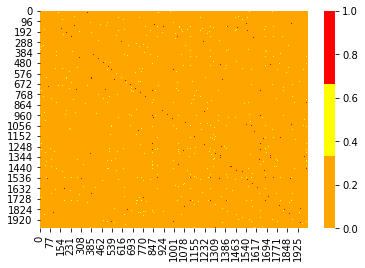

In [68]:
data = np.array(arr)
sns.heatmap(data,cmap=ListedColormap(['orange', 'yellow', 'red']))
plt.show()

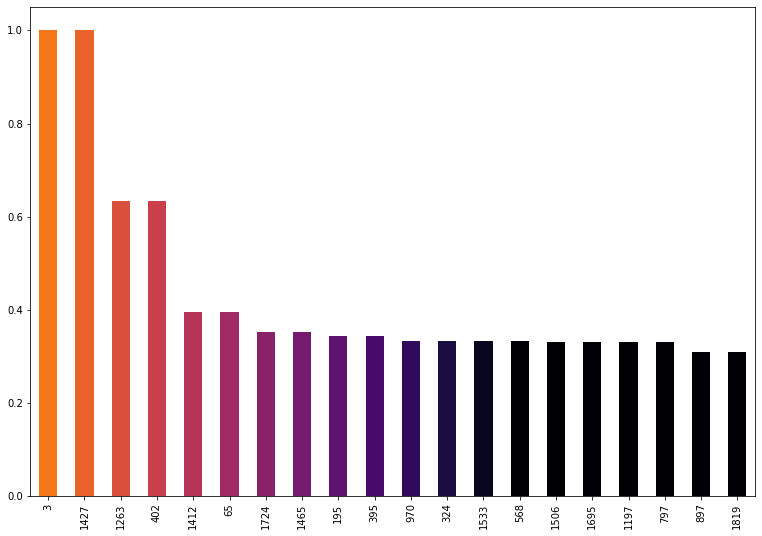

In [69]:
pd.DataFrame(arr).loc[3].sort_values(ascending = False).head(20).plot(kind = 'bar', color=color, legend=False, figsize=(13, 9))

In [70]:
df['articlelink'].iloc[3]

'Μπρούνο Λεμέρ: Ο κορονοϊός απειλεί την ευρωζώνη και το πολιτικό μέλλον της Ευρώπης'

In [71]:
df['articlelink'].iloc[1427]

'Μπρούνο Λεμέρ: Ο κορονοϊός απειλεί την ευρωζώνη και το πολιτικό μέλλον της Ευρώπης'

In [72]:
df['articlelink'].iloc[1263]

'Ντομπρόβσκις: Αδύνατο να φανταστεί κανείς το μέλλον της Ευρώπης χωρίς την Ελλάδα'

In [73]:
# Ξεκινώ να κάνω Sentiment Analysis

filepath = "https://raw.githubusercontent.com/datajour-gr/Data_journalism/master/week10/NRC_GREEK_Translated_6_2020.csv"
emolex_df = pd.read_csv(filepath)
emolex_df.head()

word  Positive  Negative  Anger  ...  Joy  Sadness  Surprise  Trust
0            αφεση       1.0       0.0    0.0  ...  0.0      0.0       0.0    0.0
1  ενορκη βεβαιωση       0.0       0.0    0.0  ...  0.0      0.0       0.0    0.0
2          εχοντας       0.0       0.0    0.0  ...  0.0      0.0       0.0    0.0
3              εχω       0.0       0.0    0.0  ...  0.0      0.0       0.0    0.0
4             οριο       0.0       0.0    0.0  ...  0.0      0.0       0.0    0.0

[5 rows x 11 columns]

In [74]:
emolex_df.tail()

word  Positive  Negative  Anger  ...  Joy  Sadness  Surprise  Trust
13166     ουρλιασμα       0.0       1.0    1.0  ...  0.0      0.0       1.0    0.0
13167  κροκος αυγου       0.0       0.0    0.0  ...  0.0      0.0       0.0    0.0
13168      νεοτερος       1.0       0.0    0.0  ...  0.0      0.0       0.0    0.0
13169       ζεφυρος       0.0       0.0    0.0  ...  0.0      0.0       0.0    0.0
13170          ζουμ       0.0       0.0    0.0  ...  0.0      0.0       0.0    0.0

[5 rows x 11 columns]

In [75]:
emolex_df = emolex_df.drop_duplicates(subset=['word'])
emolex_df = emolex_df.dropna()
emolex_df.reset_index(inplace = True)

In [76]:
emolex_df.tail()

index          word  Positive  Negative  ...  Joy  Sadness  Surprise  Trust
13156  13166     ουρλιασμα       0.0       1.0  ...  0.0      0.0       1.0    0.0
13157  13167  κροκος αυγου       0.0       0.0  ...  0.0      0.0       0.0    0.0
13158  13168      νεοτερος       1.0       0.0  ...  0.0      0.0       0.0    0.0
13159  13169       ζεφυρος       0.0       0.0  ...  0.0      0.0       0.0    0.0
13160  13170          ζουμ       0.0       0.0  ...  0.0      0.0       0.0    0.0

[5 rows x 12 columns]

In [77]:
vec = CountVectorizer(analyzer = 'word', vocabulary = emolex_df.word, 
                      strip_accents = 'unicode',  
                      stop_words= nlp.Defaults.stop_words,
                      ngram_range=(1, 2))

In [78]:
matrix = vec.fit_transform(df['articlelink'])
vocab = vec.get_feature_names()
wordcount_df = pd.DataFrame(matrix.toarray(), columns=vocab)
wordcount_df.head()

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['αδιακοπα', 'ακομα', 'ακομη', 'ακριβως', 'αλλα', 'αλλαχου', 'αλλες', 'αλλη', 'αλλην', 'αλλης', 'αλλιως', 'αλλιωτικα', 'αλλο', 'αλλοι', 'αλλοιως', 'αλλοιωτικα', 'αλλον', 'αλλος', 'αλλοτε', 'αλλου', 'αλλους', 'αλλων', 'αμα', 'αμεσα', 'αμεσως', 'ανα', 'αναμεσα', 'αναμεταξυ', 'ανευ', 'αντι', 'αντιπερα', 'αντις', 'ανω', 'ανωτερω', 'αξαφνα', 'απεναντι', 'απο', 'αποψε', 'αρα', 'αραγε', 'αρκετα', 'αρκετες', 'αρχικα', 'αυριο', 'αυτα', 'αυτες', 'αυτη', 'αυτην', 'αυτης', 'αυτο', 'αυτοι', 'αυτον', 'αυτος', 'αυτου', 'αυτους', 'αυτων', 'αφοτου', 'αφου', 'βεβαια', 'βεβαιοτατα', 'γιατι', 'γρηγορα', 'γυρω', 'δεινα', 'δεξια', 'δηθεν', 'δηλαδη', 'διαρκως', 'δικα', 'δικο', 'δικοι', 'δικος', 'δικου', 'δικους', 'διολου', 'διπλα', 'διχως', 'εαν', 'εαυτο', 'εαυτον', 'εαυτου', 'εαυτους', 'εαυτων', 'εγιναν', 'εγινε', 

αφεση  ενορκη βεβαιωση  εχοντας  εχω  ...  κροκος αυγου  νεοτερος  ζεφυρος  ζουμ
0      0                0        0    0  ...             0         0        0     0
1      0                0        0    0  ...             0         0        0     0
2      0                0        0    0  ...             0         0        0     0
3      0                0        0    0  ...             0         0        0     0
4      0                0        0    0  ...             0         0        0     0

[5 rows x 13161 columns]

In [79]:
wordcount_df.shape

(2000, 13161)

In [80]:
emolex_df.head()

index             word  Positive  Negative  ...  Joy  Sadness  Surprise  Trust
0      0            αφεση       1.0       0.0  ...  0.0      0.0       0.0    0.0
1      1  ενορκη βεβαιωση       0.0       0.0  ...  0.0      0.0       0.0    0.0
2      2          εχοντας       0.0       0.0  ...  0.0      0.0       0.0    0.0
3      3              εχω       0.0       0.0  ...  0.0      0.0       0.0    0.0
4      4             οριο       0.0       0.0  ...  0.0      0.0       0.0    0.0

[5 rows x 12 columns]

In [81]:
emolex_df[emolex_df.Anger == 1].tail()

index          word  Positive  Negative  ...  Joy  Sadness  Surprise  Trust
13094  13104      διεξοδος       0.0       0.0  ...  0.0      0.0       0.0    0.0
13096  13106        ζωυφια       0.0       1.0  ...  0.0      0.0       0.0    0.0
13100  13110    θυματοποιω       0.0       1.0  ...  0.0      1.0       1.0    0.0
13128  13138  αποτυχημενος       0.0       1.0  ...  0.0      0.0       0.0    0.0
13156  13166     ουρλιασμα       0.0       1.0  ...  0.0      0.0       1.0    0.0

[5 rows x 12 columns]

In [82]:
# Φτιάχνω μια λίστα με angry words

angry_words = emolex_df[emolex_df.Anger == 1]['word']

# Φτιάχνω μια λίστα με positive words

positive_words = emolex_df[emolex_df.Positive == 1]['word']

# Φτιάχνω μια λίστα με sadness words

sadness_words = emolex_df[emolex_df.Sadness == 1]['word']

# Φτιάχνω μια λίστα με surprise words

surprise_words = emolex_df[emolex_df.Surprise == 1]['word']

# Φτιάχνω μια λίστα με disgust words

disgust_words = emolex_df[emolex_df.Disgust == 1]['word']

# Φτιάχνω μια λίστα με anticipation words

anticipation_words = emolex_df[emolex_df.Anticipation == 1]['word']

# Φτιάχνω μια λίστα με negative words

negative_words = emolex_df[emolex_df.Negative == 1]['word']

# Φτιάχνω μια λίστα με joy words

joy_words = emolex_df[emolex_df.Joy == 1]['word']

# Φτιάχνω μια λίστα με trust words

trust_words = emolex_df[emolex_df.Trust == 1]['word']

# Φτιάχνω μια λίστα με fear words

fear_words = emolex_df[emolex_df.Fear == 1]['word']

In [83]:
df.head(3)

articlelink  ... day
date                                                           ...    
NaT                        Κάτω από το 40% η ανεργία των νέων  ...   0
2018-12-02  Ο παπάς στη Ζάκυνθο και η καταγγελία που ξετύλ...  ...   2
NaT         Κορονοϊός: Μαύρη μέρα στην Ισπανία – 950 νεκρο...  ...   0

[3 rows x 6 columns]

In [84]:
df['anger'] = wordcount_df[angry_words].sum(axis=1)

df['positive'] = wordcount_df[positive_words].sum(axis=1)

df['sadness'] = wordcount_df[sadness_words].sum(axis=1)

df['surprise'] = wordcount_df[surprise_words].sum(axis=1)

df['disgust'] = wordcount_df[disgust_words].sum(axis=1)

df['anticipation'] = wordcount_df[anticipation_words].sum(axis=1)

df['negative'] = wordcount_df[negative_words].sum(axis=1)

df['joy'] = wordcount_df[joy_words].sum(axis=1)

df['trust'] = wordcount_df[trust_words].sum(axis=1)

df['fear'] = wordcount_df[fear_words].sum(axis=1)

In [85]:
df

articlelink  ... fear
date                                                           ...     
NaT                        Κάτω από το 40% η ανεργία των νέων  ...  NaN
2018-12-02  Ο παπάς στη Ζάκυνθο και η καταγγελία που ξετύλ...  ...  NaN
NaT         Κορονοϊός: Μαύρη μέρα στην Ισπανία – 950 νεκρο...  ...  NaN
NaT         Μπρούνο Λεμέρ: Ο κορονοϊός απειλεί την ευρωζών...  ...  NaN
NaT         Γερμανικός Τύπος: Μετά τα χρόνια της κρίσης οι...  ...  NaN
2018-08-08  Τζανακόπουλος: Έρχεται λίστα με 300 αυθαίρετα ...  ...  NaN
NaT         Εικόνες από τη διαμαρτυρία γιατρών και νοσηλευ...  ...  NaN
2018-08-26  Λαφαζάνης: Ενδεικτικό της εθεδουλίας της κυβέρ...  ...  NaN
2018-06-28  Βαλκάνια και χώρες της βόρειας Αφρικής δεν θέλ...  ...  NaN
2020-04-02  Bloomberg: Η Ευρώπη μπορεί να παραδειγματιστεί...  ...  NaN
2018-12-20  Αχτσιόγλου: Τεράστιος μύθος το ότι ο ΣΥΡΙΖΑ συ...  ...  NaN
NaT         Η Ελλάδα και πάλι ενδιαφέρουσα αγορά για τις γ...  ...  NaN
NaT         Μεγάλη έρευνα: Τι συμβαίνει στα σπίτια των Ελλ...  ...  NaN
NaT         Πέντε πράγματα που πρέπει να γνωρίζουμε τις εκ...  ...  NaN
2018-11-01  Πιτσιόρλας: Οι ρυθμοί ανάπτυξης είναι υπαρκτοί...  ...  NaN
2020-03-26  Πέτσας: Επιλέξαμε την εργασία από την ανεργία....  ...  NaN
2019-07-02  Ζαχαριάδης: Στρουθοκαμηλισμός από τη ΝΔ στη Συ...  ...  NaN
2018-12-09  Παππάς: Η Ν.Δ φουσκώνει μπαλόνια και τα σκάει ...  ...  NaN
NaT         Bloomberg: Γιατί οι Έλληνες στράφηκαν εναντίον...  ...  NaN
NaT         Βουλή: Τι περιλαμβάνει το νομοσχέδιο με τις επ...  ...  NaN
2020-03-26  Βρούτσης για εκ περιτροπής εργασία: Έκτακτα, π...  ...  NaN
NaT         Γάλλος ΥΠΟΙΚ: Πρέπει να επιταχυνθεί η σταδιακή...  ...  NaN
2018-12-24  Το Streetwork και οι άστεγοι στους δρόμους της...  ...  NaN
2018-09-06  «Αλουμινάδες, σοβατζίδες, γυψαδόροι κάνουν ευχ...  ...  NaN
NaT         Φωτίου: Όταν αναλάβαμε, η χώρα είχε χάσει ήδη ...  ...  NaN
NaT         Οι 11 κλάδοι με τους 240.000 εργαζομένους πλήρ...  ...  NaN
NaT         Μητσοτάκης: Άκρατη παροχολογία από τον κ. Τσίπ...  ...  NaN
NaT         Κατηγορείται για τη δολοφονία της συζύγου του ...  ...  NaN
2019-06-19  Πόσες ώρες πρέπει να δουλεύουμε για να είμαστε...  ...  NaN
NaT         «Μαύρη» Δευτέρα στην Αργεντινή στον απόηχο της...  ...  NaN
NaT                    «Τέλος με τους χρεωκοπημένους Έλληνες»  ...  NaN
2019-11-07  Ισπανικές εκλογές: Τα τέσσερα χρόνια πολιτικής...  ...  NaN
2019-12-18  Χαρίτσης για Κουκάκι: Δεν αποσαφήνισε ο κ. Μητ...  ...  NaN
NaT         Τον Νοέμβριο το νομοσχέδιο για τη μείωση των α...  ...  NaN
NaT         Γεννηματά: Δεν θα κάνουμε αντιπολίτευση για τη...  ...  NaN
NaT         Πτώση σημειώνουν οι Διεθνείς αγορές εν μέσω φό...  ...  NaN
NaT         Παππάς: Το πρόγραμμα Μητσοτάκη περιλαμβάνει ασ...  ...  NaN
NaT         O άνθρωπος που έσωσε τους φτωχούς από τους τοκ...  ...  NaN
2020-05-26  Νετανιάχου: Το Ισραήλ δεν θα χάσει μια «ιστορι...  ...  NaN
NaT         Μειώθηκε η ανεργία τον Δεκέμβριο του 2019 – Στ...  ...  NaN
NaT         Τσίπρας: Στην οικονομία τα πράγματα θα γίνοντα...  ...  NaN
NaT         Στους 875.000 οι άνεργοι στην Ελλάδα το Νοέμβρ...  ...  NaN
NaT         Τσίπρας: Η πατρίδα μας έκανε το αποφασιστικό β...  ...  NaN
2019-09-10  Ο νέος αντίπαλος του Ερντογάν και του κόμματός...  ...  NaN
2019-06-28  «Έχω καταλήξει ότι έγινε συμπλοκή και πήγε ο Ρ...  ...  NaN
NaT         Γιακουμάτος: «Φούμαρα» η τροπολογία για την αύ...  ...  NaN
NaT         Γεροβασίλη: Η ουσία είναι ότι η κυβέρνηση διασ...  ...  NaN
NaT         Κουμουτσάκος: Μονοπώλιο κοινωνικής ευαισθησίας...  ...  NaN
2018-08-22  ΓΣΕΕ: Φαινομενική και ουδόλως ουσιαστική η έξο...  ...  NaN
NaT         Μίχαλος: Πρέπει να συνειδητοποιήσουμε ότι η λο...  ...  NaN
NaT         «Ο Τσίπρας υπόσχεται αύξηση του κατώτατου μισθ...  ...  NaN
NaT         Αυστραλία: Πάνω από 150 οικονομολόγοι ζητούν ν...  ...  NaN
NaT         «Πράσινο φως» Μητσοτάκη σε Γιαννακόπουλο για τ...  ...  NaN
2018-12-30  Σημίτης: Οι Ευρωπαίοι θεωρούν βέβαιο ότι η Ελλ...  ...  NaN
NaT         ΓΣΕΕ: 

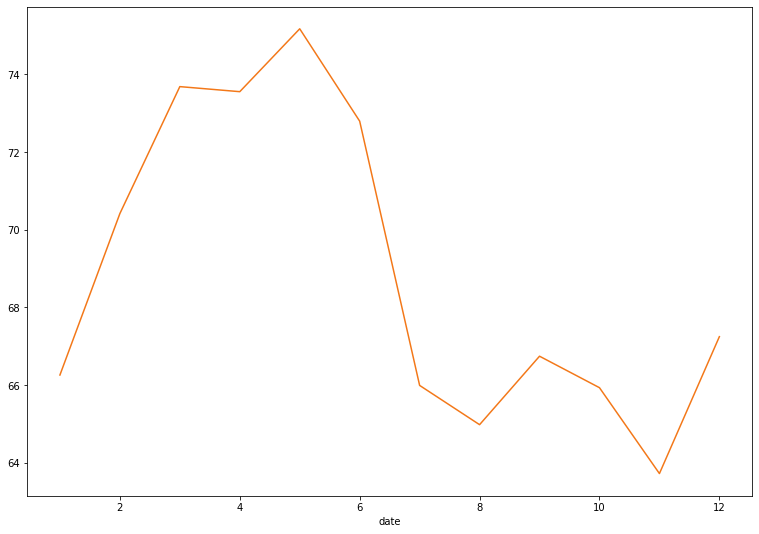

In [86]:
df['articlelink'].str.len().groupby(by=df.index.month).mean().plot(color=color, legend=False, figsize=(13, 9)) 

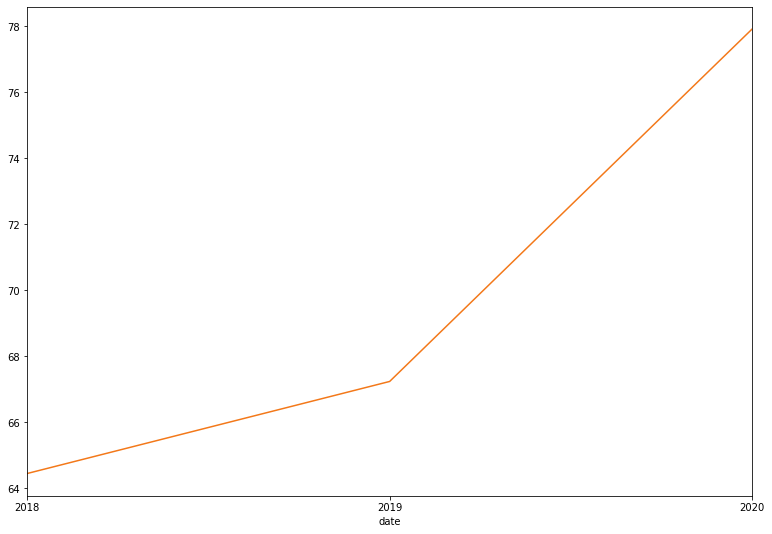

In [87]:
df['articlelink'].str.len().resample('A').mean().plot(color=color, legend=False, figsize=(13, 9)) 